<a href="https://colab.research.google.com/github/ritzx21/Loan_Eligibility/blob/main/Loan_Eligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import Training Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ritzx21/Loan_Eligibility/main/Training%20Data.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Analyse Data

In [ ]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Ratio of Male to Female : 286/70

In [ ]:
ratio = 286/70
ratio

4.085714285714285

In [ ]:
pd.crosstab(df['Loan_Status'],df['Education'])

Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


In [ ]:
pd.crosstab(df["Gender"],df["Married"])

Married,No,Yes
Gender,,
Female,80,31
Male,130,357


<Axes: >

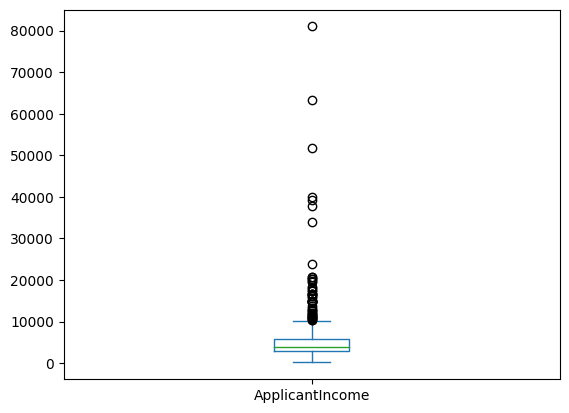

In [ ]:
df["ApplicantIncome"].plot(kind = 'box')

<Axes: >

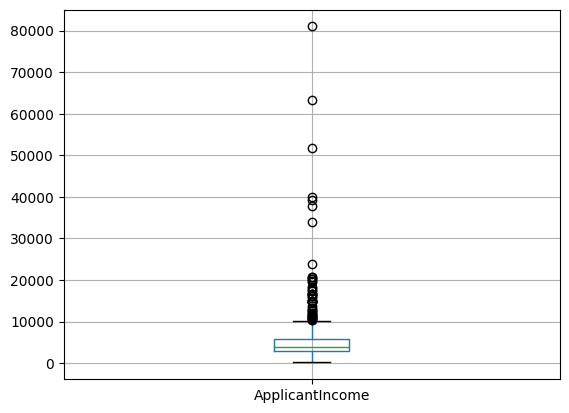

In [ ]:
df.boxplot(column='ApplicantIncome')

<Axes: ylabel='Frequency'>

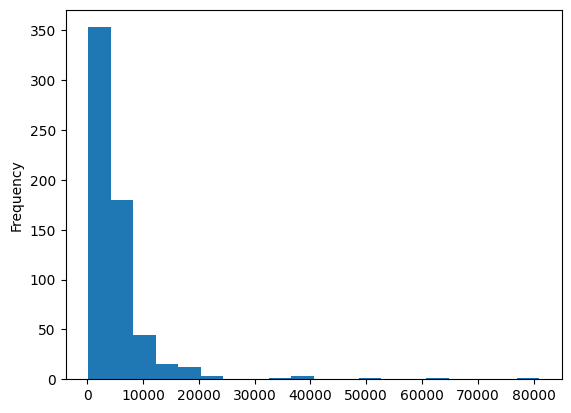

In [ ]:
df["ApplicantIncome"].plot(kind='hist',bins=20)

array([[<Axes: title={'center': 'ApplicantIncome'}>]], dtype=object)

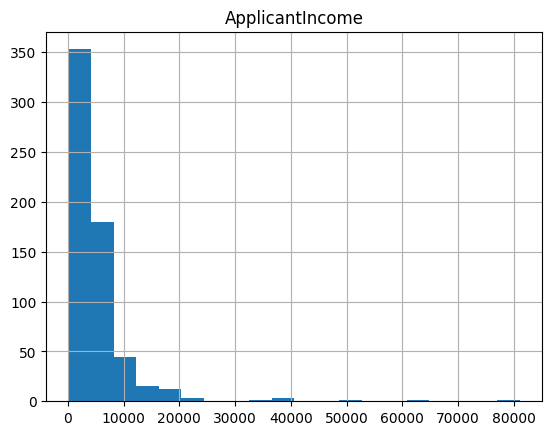

In [ ]:
df.hist(column='ApplicantIncome',bins=20)

Right Skewed

<Axes: >

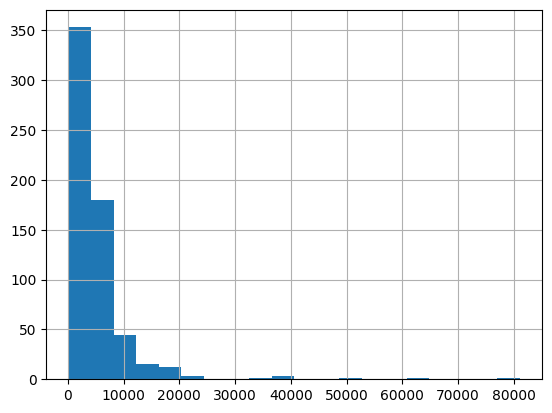

In [ ]:
df['ApplicantIncome'].hist(bins=20)

<Axes: ylabel='Frequency'>

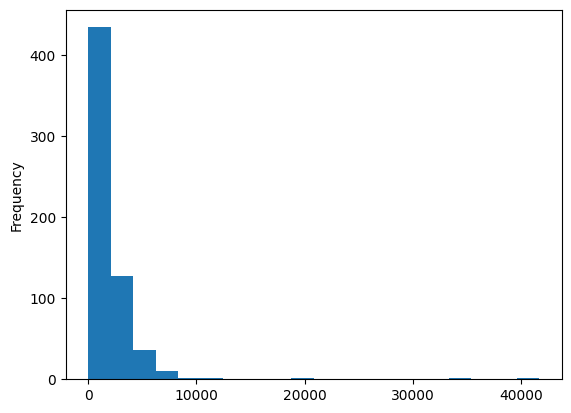

In [ ]:
df["CoapplicantIncome"].plot(kind='hist',bins=20)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Text(0, 0.5, 'Applicant Income')

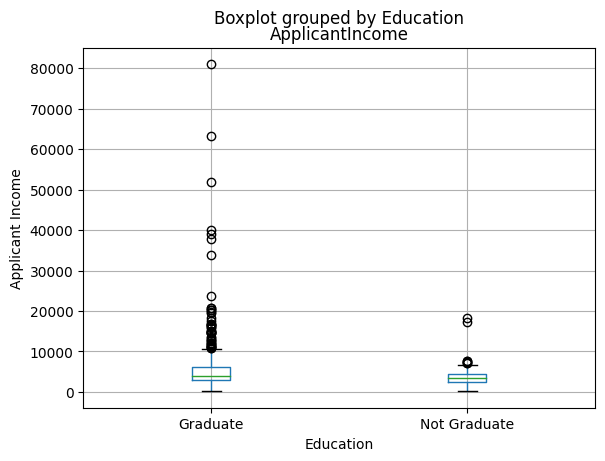

In [ ]:
ax = df.boxplot(column='ApplicantIncome', by='Education')
ax.set_ylabel('Applicant Income')

the median salary/income of the graduate and the non graduates are similar but some of the graduates have very high salary.

<Axes: title={'center': 'LoanAmount'}, xlabel='Education'>

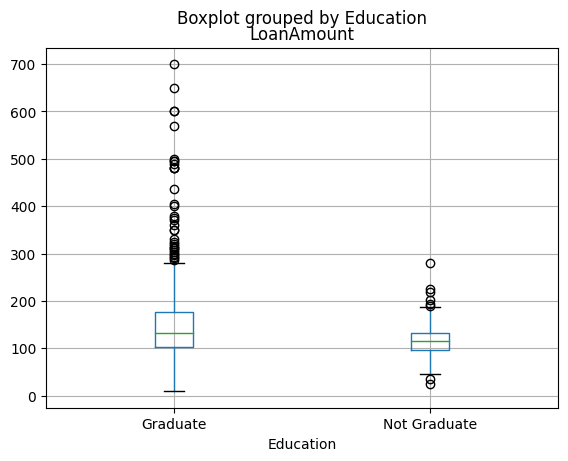

In [ ]:
df.boxplot(column = 'LoanAmount',by='Education')

<Axes: ylabel='Frequency'>

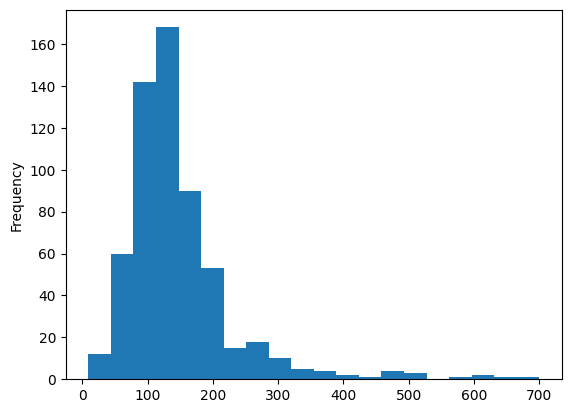

In [ ]:
df['LoanAmount'].plot(kind='hist',bins=20)

<Axes: >

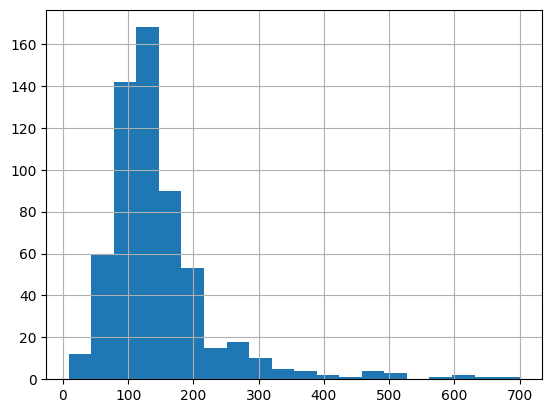

In [ ]:
df['LoanAmount'].hist(bins=20)

### Normalizing this LoanAmount variable using Log with numpy

<Axes: >

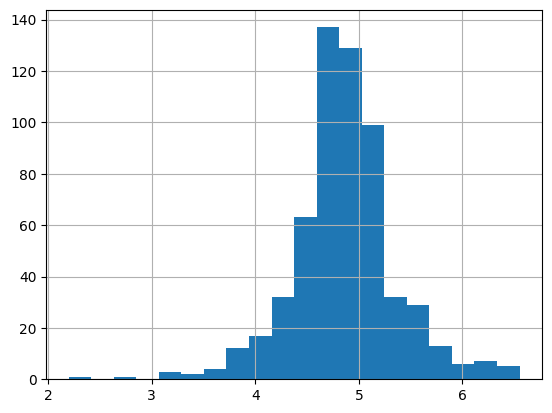

In [ ]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
#df['LoanAmount_log'].plot(kind='hist',bins=20)
df['LoanAmount_log'].hist(bins=20)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


In [ ]:
df.isnull().sum()  #Missing Values in the dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

## Filling Up missing values

Since gender is a categorical variable we will use 'mode' function to fill up the values

What it does is , finds the mode of the values, in this case 'Gender' column and then fills up the missing value with the mode value
And we will use the inpnplace function to replace with mode where the values are missing.


---


For numerical values , like in the LoanAmount, LoanAmount_log etc column we will use 'mean' function to fill up the missing values.

In [ ]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [ ]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

In [ ]:
df['Dependents'].fillna(df['Gender'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [ ]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [ ]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

In [ ]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [ ]:
df['Credit_History'].fillna(df["Credit_History"].mode()[0], inplace = True)

In [ ]:
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

Removed all missing Values

### Normalizing

Histograms for both Applicant Income and Coapplicant income were right-skewed.

Hence we will find the  --> total income = Applicant Income + Coapplicant income , then use log function to normalize them.

In [ ]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

<Axes: >

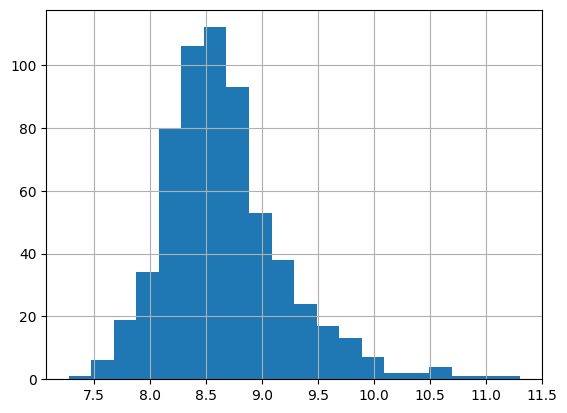

In [ ]:
df['TotalIncome_log'].hist(bins=20)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


Divide dataset into dependent and Independent Variables

In [ ]:
ax = df.drop('Loan_ID',axis =1)
X = np.array(ax.drop('Loan_Status',axis=1))
Y = np.array(df.Loan_Status)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

In [ ]:
print(X_train)

[['Male' 'Yes' '0' ... 5.579729825986222 8250.0 9.017968479328726]
 ['Male' 'Yes' '0' ... 4.875197323201151 5858.0 8.675563527387679]
 ['Male' 'Yes' '2' ... 5.3471075307174685 7945.0 8.980298078970817]
 ...
 ['Female' 'No' '0' ... 3.4011973816621555 3237.0 8.082402253926244]
 ['Female' 'Yes' 'Male' ... 4.857444178729352 10047.0 9.215029361462314]
 ['Male' 'Yes' 'Male' ... 4.857444178729352 13650.0 9.521494800613105]]


In [ ]:
len(X_train)

491

In [ ]:
len(Y_train)

491

In [ ]:
len(X_test)

123

In [ ]:
len(Y_test)

123

In [ ]:
print(X_train)

[['Male' 'Yes' '0' ... 5.579729825986222 8250.0 9.017968479328726]
 ['Male' 'Yes' '0' ... 4.875197323201151 5858.0 8.675563527387679]
 ['Male' 'Yes' '2' ... 5.3471075307174685 7945.0 8.980298078970817]
 ...
 ['Female' 'No' '0' ... 3.4011973816621555 3237.0 8.082402253926244]
 ['Female' 'Yes' 'Male' ... 4.857444178729352 10047.0 9.215029361462314]
 ['Male' 'Yes' 'Male' ... 4.857444178729352 13650.0 9.521494800613105]]


There are some categorial data in X_train i.e,  the Yes No , Male Female , which we need to change to 0 and 1 s

Hence we will be using label encoder to convert Yes No ,Male Female into 0,1s and True False

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder_X = LabelEncoder()

In [ ]:
for i in range(0,5):
  X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

In [ ]:
X_train[:,10] = labelencoder_X.fit_transform(X_train[:,10])

In [ ]:
X_train

array([[1, 1, 0, ..., 5.579729825986222, 8250.0, 9.017968479328726],
       [1, 1, 0, ..., 4.875197323201151, 5858.0, 8.675563527387679],
       [1, 1, 2, ..., 5.3471075307174685, 7945.0, 8.980298078970817],
       ...,
       [0, 0, 0, ..., 3.4011973816621555, 3237.0, 8.082402253926244],
       [0, 1, 4, ..., 4.857444178729352, 10047.0, 9.215029361462314],
       [1, 1, 4, ..., 4.857444178729352, 13650.0, 9.521494800613105]],
      dtype=object)

Y_train is also in Y's and N's , so we need to use label encoder to convert it to 0's and 1's

In [ ]:
labelencoder_Y = LabelEncoder()
Y_train = labelencoder_Y.fit_transform(Y_train)

Now we also need to change the categorical values of the testing dataset

In [ ]:
Y_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [ ]:
for i in range(0,5):
  X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])

X_test[:,10] = labelencoder_X.fit_transform(X_test[:,10])

In [ ]:
X_test

array([[1, 1, 0, ..., 5.429345628954441, 9083.0, 9.114159813502214],
       [1, 1, 0, ..., 4.867534450455582, 4310.0, 8.368693183097793],
       [1, 1, 2, ..., 5.062595033026967, 5614.0, 8.633018756921828],
       ...,
       [1, 1, 1, ..., 4.812184355372417, 4725.0, 8.460622839927844],
       [1, 1, 2, ..., 4.6913478822291435, 4340.0, 8.375629627094451],
       [1, 1, 0, ..., 6.194405391104672, 63337.0, 11.05622495553552]],
      dtype=object)

In [ ]:
Y_test = labelencoder_Y.fit_transform(Y_test)

In [ ]:
Y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

### Scaling the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

Fitting the training dataset in the decision tree aldorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTCmodel = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTCmodel.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_predict = DTCmodel.predict(X_test)

In [ ]:
Y_predict

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
Y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn import metrics

In [ ]:
print("The accuracy of Decision Tree is : ", metrics.accuracy_score(Y_predict , Y_test))

The accuracy of Decision Tree is :  0.6747967479674797


### Applying another algoithm to improve algorithm

Initially we applied the decision tree algorithm , this time we will apply 'Naive Bayes' algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBCmodel =  GaussianNB()  #NBCmodel for - Naive Bayes Classifier Model

In [ ]:
NBCmodel.fit(X_train,Y_train)

GaussianNB()

In [ ]:
Y_predict = NBCmodel.predict(X_test)

In [ ]:
Y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
Y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn import metrics
metrics.accuracy_score(Y_predict,Y_test)

0.8048780487804879

In [ ]:
print("The accuracy of Naive Bayes Classifier Model is : ", metrics.accuracy_score(Y_predict,Y_test))

The accuracy of Naive Bayes Classifier Model is :  0.8048780487804879


### importing Test Dataset

In [146]:
test_df = pd.read_csv("https://raw.githubusercontent.com/ritzx21/Loan_Eligibility/main/Testing%20Data.csv")

In [147]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [148]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [149]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Test data has some missing values , hence we need to remove these missing values first.

In [150]:
test_df['Gender'] = test_df['Gender'].fillna(test_df['Gender'].mode()[0])

In [151]:
test_df['Dependents'] = test_df['Dependents'].fillna(test_df['Dependents'].mode()[0])

In [152]:
test_df['Self_Employed'] = test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0])

In [153]:
test_df.LoanAmount = test_df.LoanAmount.fillna(test_df.LoanAmount.mean())

In [154]:
test_df.Loan_Amount_Term = test_df.Loan_Amount_Term.fillna(test_df.Loan_Amount_Term.mean())

In [155]:
test_df['Credit_History'] = test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])

In [156]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

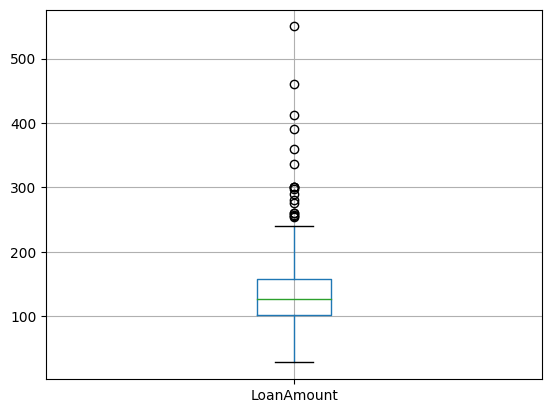

In [157]:
test_df.boxplot('LoanAmount')

<Axes: >

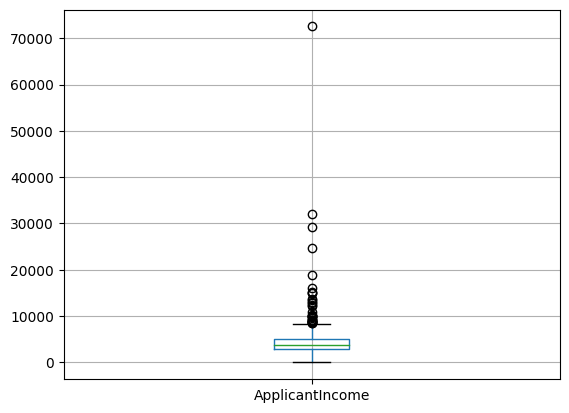

In [158]:
test_df.boxplot('ApplicantIncome')

In [159]:
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])  #log function to normalise the Loan Amount variable

In [160]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709


Finding total Income , then taking log of the total income , similar to what was done during the training dataset to normalize the values.

In [161]:
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

In [162]:
test_df['TotalIncome_log'] = np.log(test_df['TotalIncome'])

In [163]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [164]:
test  = np.array(test_df.drop('Loan_ID',axis=1))

In [165]:
test

array([['Male', 'Yes', '0', ..., 4.700480365792417, 5720,
        8.651724084373843],
       ['Male', 'Yes', '1', ..., 4.836281906951478, 4576,
        8.428580533059634],
       ['Male', 'Yes', '2', ..., 5.337538079701318, 6800,
        8.824677891164198],
       ...,
       ['Male', 'No', '0', ..., 4.836281906951478, 5243,
        8.564649132572534],
       ['Male', 'Yes', '0', ..., 5.062595033026967, 7393,
        8.9082888855571],
       ['Male', 'No', '0', ..., 4.584967478670572, 9200,
        9.126958763037132]], dtype=object)

In [166]:
for i in range(0,5):
  test[:,i] = labelencoder_X.fit_transform(test[:,i])

In [167]:
for i in range(9,11):
  test[:,i] = labelencoder_X.fit_transform(test[:,i])

In [168]:
test

array([[1, 1, 0, ..., 4.700480365792417, 5720, 8.651724084373843],
       [1, 1, 1, ..., 4.836281906951478, 4576, 8.428580533059634],
       [1, 1, 2, ..., 5.337538079701318, 6800, 8.824677891164198],
       ...,
       [1, 0, 0, ..., 4.836281906951478, 5243, 8.564649132572534],
       [1, 1, 0, ..., 5.062595033026967, 7393, 8.9082888855571],
       [1, 0, 0, ..., 4.584967478670572, 9200, 9.126958763037132]],
      dtype=object)

Scale Data

In [169]:
test = ss.fit_transform(test)

In [170]:
pred = NBCmodel.predict(test)

In [171]:
pred   #1 means applicant is eligible for loan and 0 means not eligible according to the naive bayes classifier model

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [172]:
test_df['Predicted_Loan_Status'] = pred

In [173]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,Predicted_Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388,5786,8.663196,1
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932,4867,8.490233,1
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282,5243,8.564649,1
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595,7393,8.908289,1
